# Lenet training

### This script show you how to fit Lenet algo in your data, display ther performance and save the model

## Load libraries

In [ ]:
import pandas as pd # Pour manipuler des DataFrames pandas
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.applications.vgg16 import preprocess_input
import Lenet_training_functions as fn
import matplotlib.pyplot as plt

## Parameters (please feel free to change them)

In [2]:
test_size=0.2
batch_size = 600
Minimum_Number_Class=100
epochs=200
dropout_rate=0.5
zoom_range=1.1
horizontal_flip=False
rotation_range=10

## Generate train and test generators

In [ ]:
Tiny_images=pd.read_csv("../../Materiels/Tiny_images.csv")
data_train,data_test= train_test_split(Tiny_images,stratify=Tiny_images["classe"], test_size=test_size,random_state=42)
train_data_generator = ImageDataGenerator(
        preprocessing_function = preprocess_input,
        rotation_range = rotation_range,
        zoom_range = zoom_range,
        horizontal_flip = horizontal_flip)


test_data_generator = ImageDataGenerator(
    preprocessing_function = preprocess_input)




train_generator = train_data_generator.flow_from_dataframe(dataframe=data_train,
                                                          directory='../../../../Tiny_images/Images_test/',
                                                           x_col = "imagetteName",
                                                           y_col = "classe",
                                                           class_mode ="sparse",
                                                          target_size = (28 , 28), 
                                                          batch_size = batch_size)


test_generator = test_data_generator.flow_from_dataframe(dataframe=data_test,
                                                          directory='../../../../Tiny_images/Images_test/',
                                                           x_col = "imagetteName",
                                                            y_col = "classe",
                                                           class_mode ="sparse",
                                                          target_size = (28 , 28), 
                                                          batch_size = batch_size)

NB_CLASSES=len(set(train_generator.classes))
               

## Train and evaluate performance of algo

Epoch 1/200
8/8 [==============================] - 93s 12s/step - loss: 6.4881 - accuracy: 0.3306 - val_loss: 2.0276 - val_accuracy: 0.5461
Epoch 2/200
8/8 [==============================] - 14s 2s/step - loss: 1.8430 - accuracy: 0.5320 - val_loss: 1.4883 - val_accuracy: 0.5997
Epoch 3/200
8/8 [==============================] - 5s 663ms/step - loss: 1.4138 - accuracy: 0.5402 - val_loss: 1.1426 - val_accuracy: 0.6365
Epoch 4/200
8/8 [==============================] - 5s 665ms/step - loss: 1.1913 - accuracy: 0.6240 - val_loss: 1.0315 - val_accuracy: 0.6767
Epoch 5/200
8/8 [==============================] - 5s 665ms/step - loss: 1.1187 - accuracy: 0.6406 - val_loss: 0.9923 - val_accuracy: 0.6868
Epoch 6/200
8/8 [==============================] - 5s 683ms/step - loss: 1.0795 - accuracy: 0.6614 - val_loss: 0.9277 - val_accuracy: 0.6968
Epoch 7/200
8/8 [==============================] - 5s 641ms/step - loss: 0.9962 - accuracy: 0.6729 - val_loss: 0.8959 - val_accuracy: 0.7085
Epoch 8/200
8/8 

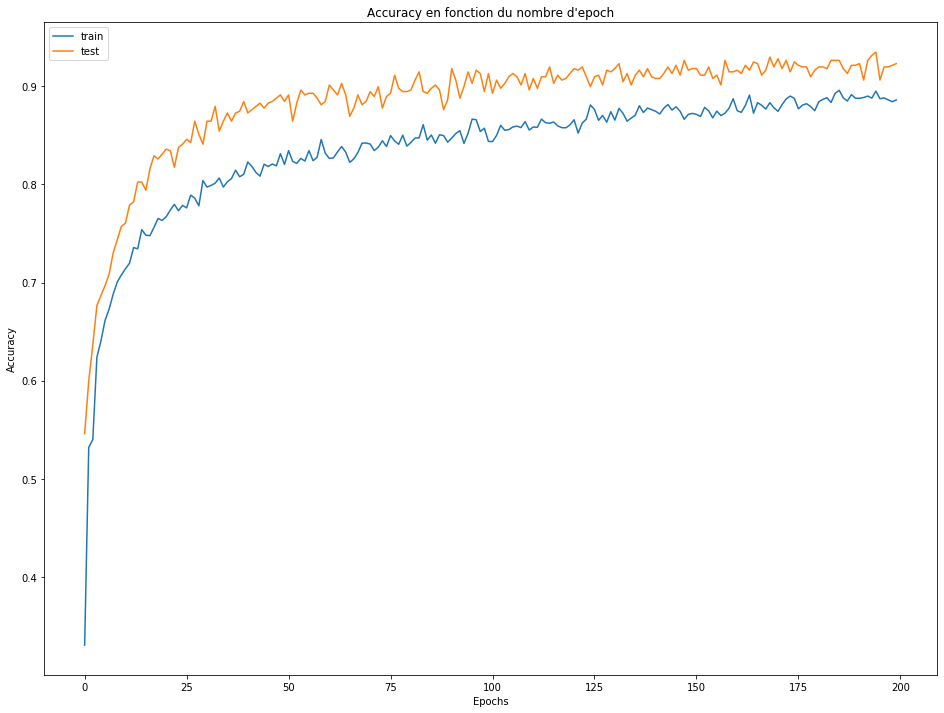

In [9]:
nn=fn.Lenet_archi(NB_CLASSES,dropout_rate)
# Compilation
nn.compile(loss='sparse_categorical_crossentropy',  # fonction de perte
              optimizer='adam',                 # algorithme de descente de gradient
              metrics=['accuracy'])             # métrique d'évaluation


history=nn.fit_generator( train_generator,
                           steps_per_epoch=len(data_train)//batch_size,
                           epochs=epochs,
                           workers=-1,
                           validation_data=test_generator,
                           validation_steps=len(data_test)//batch_size)

plt.figure(figsize=(16,12))

plt.plot(history.history['acc'],label="train");
plt.plot(history.history['val_acc'],label="test");
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy en fonction du nombre d'epoch");
plt.legend();
#If doesn't work try to replace accuracy by acc

#Note test set has better result than the test because there is no data augmentation on this set (rotation zoom)

## Save model if you are satisfied of the result

In [ ]:
nn.save('../../Materiels/Models/drop_out.50')